In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  # Add this import statement
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('Reviews Data.csv')

# Drop rows with missing values in 'REVIEW_CONTENT'
df = df.dropna(subset=['REVIEW_CONTENT'])

# Assign labels based on sentiment polarity (you can customize this based on your needs)
df['LABEL'] = pd.cut(df['REVIEW_CONTENT'].apply(lambda x: TextBlob(str(x)).sentiment.polarity),
                     bins=[-float('inf'), -0.3, 0.1, 0.4, 0.7, float('inf')],
                     labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
                     include_lowest=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['REVIEW_CONTENT'], df['LABEL'], test_size=0.2, random_state=42
)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
train_vectors_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_vectors_tfidf = tfidf_vectorizer.transform(test_data)

# Define classifiers
naive_bayes_classifier = MultinomialNB(alpha=best_alpha)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an ensemble of classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes_classifier),
    ('random_forest', random_forest_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(train_vectors_tfidf, train_labels)

# Make predictions on the test set
predictions_ensemble = ensemble_classifier.predict(test_vectors_tfidf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(test_labels, predictions_ensemble)
conf_matrix_ensemble = confusion_matrix(test_labels, predictions_ensemble)
classification_rep_ensemble = classification_report(test_labels, predictions_ensemble)

# Display the results
print(f'Ensemble Model Accuracy: {accuracy_ensemble:.2f}')
print(f'Confusion Matrix (Ensemble):\n{conf_matrix_ensemble}')
print(f'Classification Report (Ensemble):\n{classification_rep_ensemble}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ensemble Model Accuracy: 0.77
Confusion Matrix (Ensemble):
[[ 703  190   41    0    2]
 [  53 1238  168    0    2]
 [  30  496 2110    0   12]
 [   5    3    1    0    0]
 [  18   64  357    0  861]]
Classification Report (Ensemble):
               precision    recall  f1-score   support

     Negative       0.87      0.75      0.81       936
      Neutral       0.62      0.85      0.72      1461
     Positive       0.79      0.80      0.79      2648
Very Negative       0.00      0.00      0.00         9
Very Positive       0.98      0.66      0.79      1300

     accuracy                           0.77      6354
    macro avg       0.65      0.61      0.62      6354
 weighted avg       0.80      0.77      0.78      6354



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


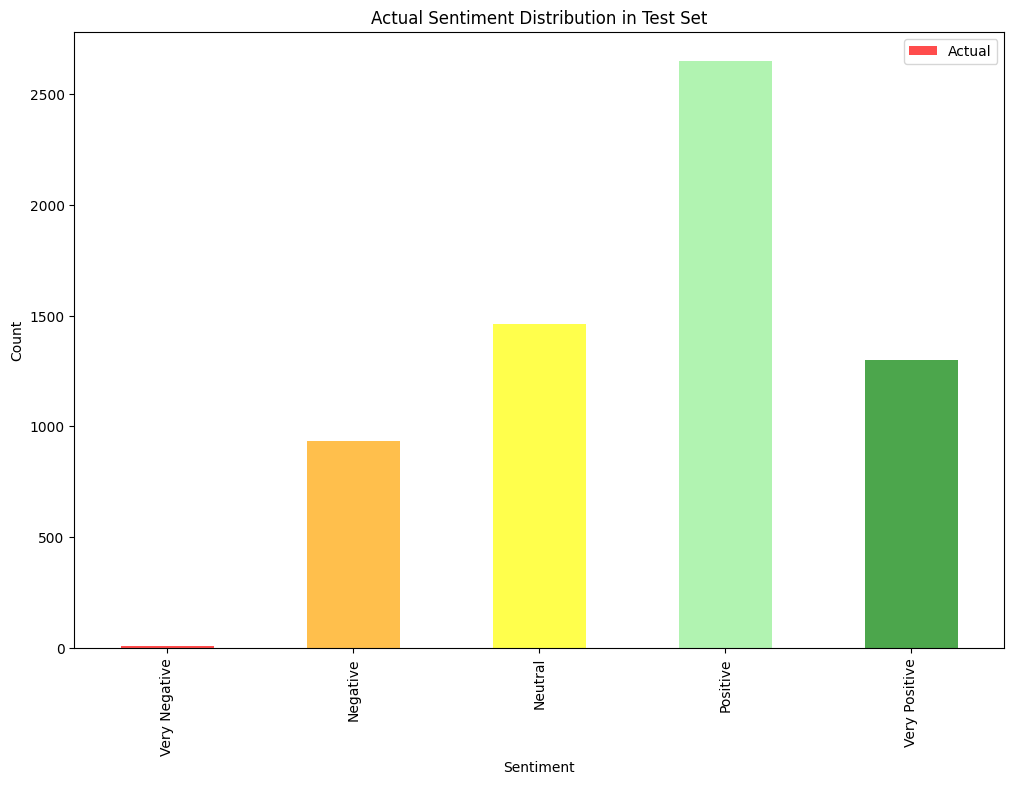

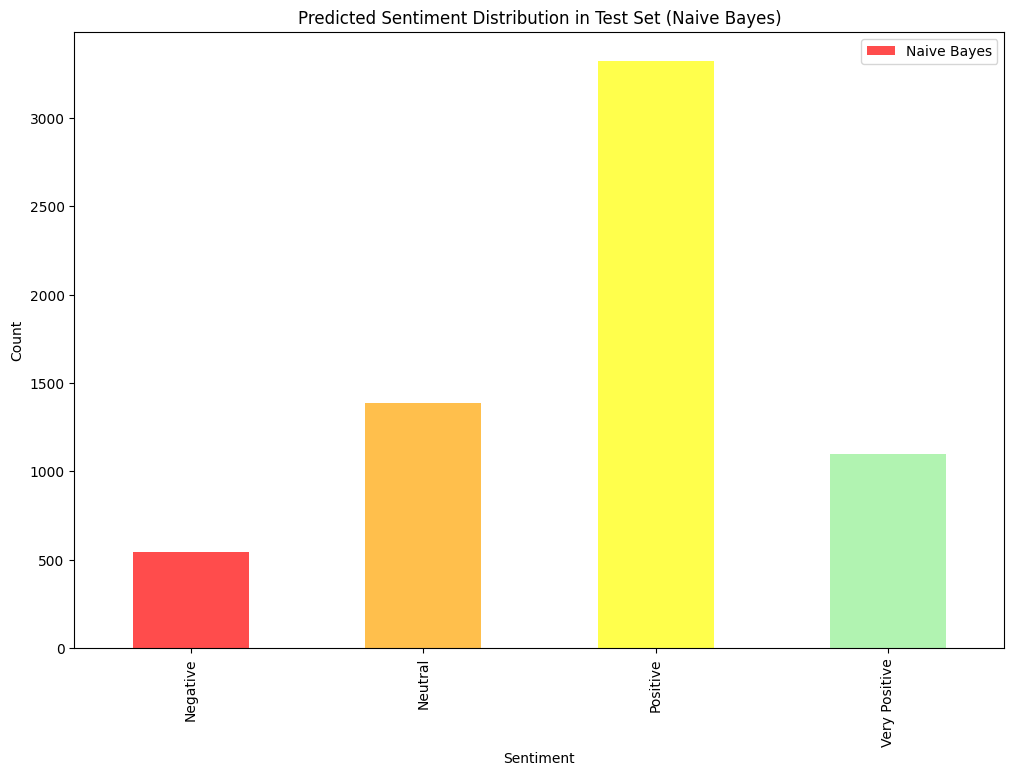

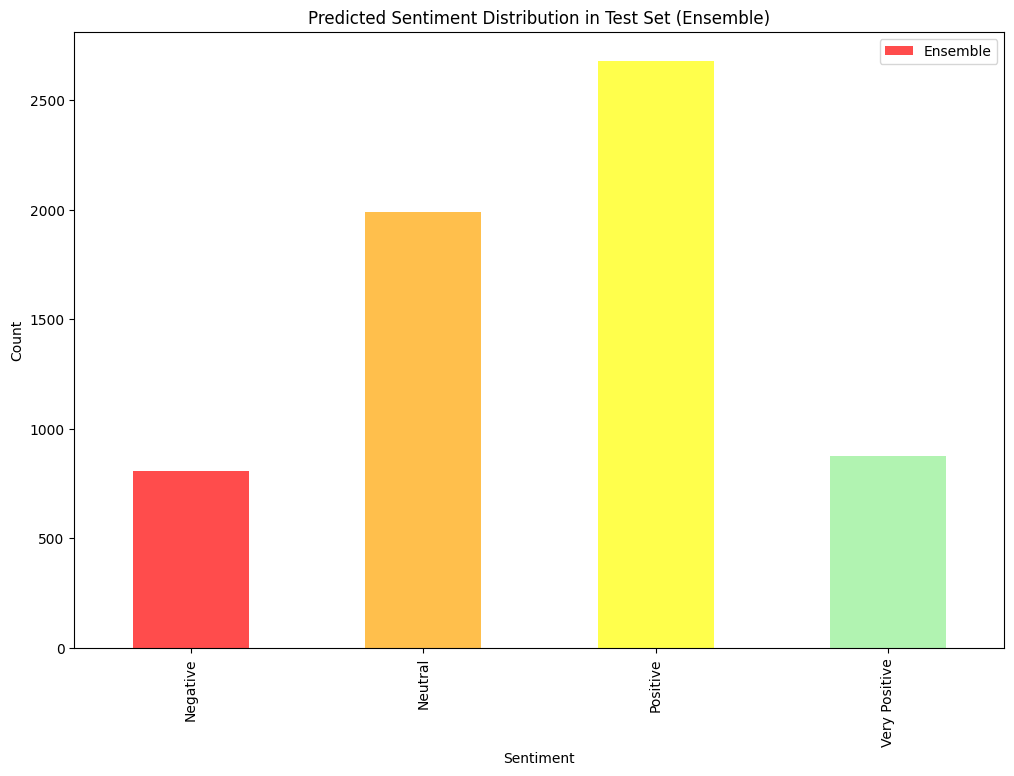

Naive Bayes Accuracy: 0.71
Ensemble Model Accuracy: 0.77


In [13]:
import matplotlib.pyplot as plt

# Plotting actual sentiment distribution in the test set
plt.figure(figsize=(12, 8))
test_labels.value_counts().sort_index().plot(kind='bar', color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.7, label='Actual')
plt.title('Actual Sentiment Distribution in Test Set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting predicted sentiment distribution for Naive Bayes
plt.figure(figsize=(12, 8))
pd.Series(predictions).value_counts().sort_index().plot(kind='bar', color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.7, label='Naive Bayes')
plt.title('Predicted Sentiment Distribution in Test Set (Naive Bayes)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting predicted sentiment distribution for Ensemble
plt.figure(figsize=(12, 8))
pd.Series(predictions_ensemble).value_counts().sort_index().plot(kind='bar', color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.7, label='Ensemble')
plt.title('Predicted Sentiment Distribution in Test Set (Ensemble)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

# Display accuracy of the models
print(f'Naive Bayes Accuracy: {accuracy:.2f}')
print(f'Ensemble Model Accuracy: {accuracy_ensemble:.2f}')
